In [67]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv('HousingPrice.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#Problem 1

## Problem 1.1

In [15]:
X = df.GrLivArea
y = df.SalePrice

#reg = LinearRegression(X,y)
X = sm.add_constant(X)
model = sm.OLS(y,X)
model1 = model.fit()

print(model1.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 24 Feb 2021   Prob (F-statistic):          4.52e-223
Time:                        18:58:32   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

Based on the t value of 38.348 and p-value < .05 (chosen alpha), we can reject the null hypothesis that B1 is equal to zero. Therefore there is a relationship between GrLivArea and SalePrice

##Problem 1.2

In [16]:
print('The approximate 95% confidence interval is:[',(107.1304 - 2*(2.794)),',',(107.1304 + 2*(2.794)),']')
print("The confidence interval does not include zero so would be strong")

The approximate 95% confidence interval is:[ 101.5424 , 112.71839999999999 ]
The confidence interval does not include zero so would be strong


##Problem 1.3

In [17]:
print("Predicted value for house with 2000 GrLivArea", model1.predict([1,2000]))
print("Predicted value for house with 2500 GrLivArea",model1.predict([1, 2500]))


Predicted value for house with 2000 GrLivArea [232829.74378814]
Predicted value for house with 2500 GrLivArea [286394.92327105]


##Problem 1.4

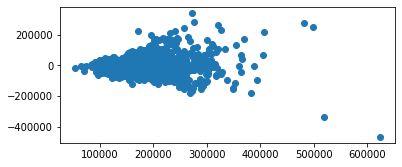

In [18]:
pred_val = model1.fittedvalues.copy()

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(pred_val,model1.resid)

##Problem 1.5

In [19]:
print("R-squared:                       0.502\n50.2% of variability of SalePrice is explained by the GrLivArea")

R-squared:                       0.502
50.2% of variability of SalePrice is explained by the GrLivArea


##Problem 1.6

In [20]:
from scipy.stats import pearsonr

print("The Pearson correlation coefficient between “GrLivArea” and “SalePrice” based on the model is\n", pearsonr(df.GrLivArea,y))

The Pearson correlation coefficient between “GrLivArea” and “SalePrice” based on the model is
 (0.7086244776126522, 4.518033646779431e-223)


#Problem 2

##Problem 2.1

In [21]:
X1 = pd.get_dummies(df['ExterQual'])

a = X1.Ex

a = sm.add_constant(a)
dummyreg1 = sm.OLS(y,a)
dummyreg1 = dummyreg1.fit()

print(dummyreg1.summary())
print("\n\nThe confidence interval is equal to: [",(dummyreg1.params.Ex-2*dummyreg1.bse.Ex),
      ",", (dummyreg1.params.Ex+2*dummyreg1.bse.Ex),"]")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     372.6
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           4.07e-74
Time:                        18:58:46   Log-Likelihood:                -18378.
No. Observations:                1460   AIC:                         3.676e+04
Df Residuals:                    1458   BIC:                         3.677e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.74e+05   1890.079     92.079      0.0

The confidence interval does not include zero, therefore the Beta1 is significant in the model.

##Problem 2.2

In [22]:
b = X1[['Ex','Fa','Gd']]

b = sm.add_constant(b)
dummyreg2 = sm.OLS(y,b)
dummyreg2 = dummyreg2.fit()

print(dummyreg2.summary())

print("\n\nThe parameters are:\n",dummyreg2.params)
print("\nBeta1 is 223019, Beta2 is -56356 and Beta3 is 87292")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     443.3
Date:                Wed, 24 Feb 2021   Prob (F-statistic):          1.44e-204
Time:                        18:58:49   Log-Likelihood:                -18070.
No. Observations:                1460   AIC:                         3.615e+04
Df Residuals:                    1456   BIC:                         3.617e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.443e+05   1909.966     75.573      0.0

##Problem 2.3

In [23]:
print("The three regression coefficients mean that in the regression equation:")
print("SalesPrice = B_0 + B_1*X1 + B_2*X2 + B_3*X3")
print("if ExterQual is TA then X1,X2 and X3 will be zero and SalesPrice will be equal to B_0 or", dummyreg2.params.const)
print("If ExterQual is Ex then SalesPrice = B_0 + B_1 =", dummyreg2.params.const + dummyreg2.params.Ex)
print("If ExterQual is Fa then SalesPrice = B_0 + B_2 =", dummyreg2.params.const + dummyreg2.params.Fa)
print("and if ExterQual is Gd then SalesPrice = B_0 + B_3 =",dummyreg2.params.const + dummyreg2.params.Gd)

The three regression coefficients mean that in the regression equation:
SalesPrice = B_0 + B_1*X1 + B_2*X2 + B_3*X3
if ExterQual is TA then X1,X2 and X3 will be zero and SalesPrice will be equal to B_0 or 144341.31346578363
If ExterQual is Ex then SalesPrice = B_0 + B_1 = 367360.96153846174
If ExterQual is Fa then SalesPrice = B_0 + B_2 = 87985.21428571378
and if ExterQual is Gd then SalesPrice = B_0 + B_3 = 231633.5102459016


##Problem 2.4

In [24]:
print("R-squared:                       ",dummyreg2.rsquared)
print('%.1f%% of variability of SalePrice is explained by the model' % (dummyreg2.rsquared*100))

R-squared:                        0.4773877777270067
47.7% of variability of SalePrice is explained by the model


##Problem 2.5

In [25]:
print("Pearson correlation coefficient would be wrong to use here because Pearson only works for two continuous")
print("variables")

Pearson correlation coefficient would be wrong to use here because Pearson only works for two continuous
variables


##Problem 2.6

In [26]:
print("When all other variables are the same, a house with Ex \"ExterQual\" will be be predicted to be", dummyreg2.params.Ex - dummyreg2.params.Gd)
print("more than a house with Gd \"ExterQual\".")

When all other variables are the same, a house with Ex "ExterQual" will be be predicted to be 135727.4512925601
more than a house with Gd "ExterQual".


#Problem 3

##Problem 3.1

In [129]:
data = df
data= data.dropna(axis=1,thresh=500)
data=data.drop(['Id'],axis=1)
data = pd.concat([data, pd.get_dummies(data['MSZoning'])], axis=1)
del data['MSZoning']
data = pd.concat([data, pd.get_dummies(data['Street'])], axis=1)
del data['Street']
data = pd.concat([data, pd.get_dummies(data['LotShape'])], axis=1)
del data['LotShape']
data = pd.concat([data, pd.get_dummies(data['LandContour'])], axis=1)
del data['LandContour']
data = pd.concat([data, pd.get_dummies(data['Utilities'])], axis=1)
del data['Utilities']
data = pd.concat([data, pd.get_dummies(data['LotConfig'])], axis=1)
del data['LotConfig']
data = pd.concat([data, pd.get_dummies(data['LandSlope'])], axis=1)
del data['LandSlope']
data = pd.concat([data, pd.get_dummies(data['Neighborhood'])], axis=1)
del data['Neighborhood']
data = pd.concat([data, pd.get_dummies(data['Condition1'])], axis=1)
del data['Condition1']
data = pd.concat([data, pd.get_dummies(data['Condition2'])], axis=1)
del data['Condition2']
data = pd.concat([data, pd.get_dummies(data['BldgType'])], axis=1)
del data['BldgType']
data = pd.concat([data, pd.get_dummies(data['HouseStyle'])], axis=1)
del data['HouseStyle']
data = pd.concat([data, pd.get_dummies(data['RoofStyle'])], axis=1)
del data['RoofStyle']
data = pd.concat([data, pd.get_dummies(data['RoofMatl'])], axis=1)
del data['RoofMatl']
data = pd.concat([data, pd.get_dummies(data['Exterior1st'])], axis=1)
del data['Exterior1st']
data = pd.concat([data, pd.get_dummies(data['Exterior2nd'])], axis=1)
del data['Exterior2nd']
data = pd.concat([data, pd.get_dummies(data['MasVnrType'])], axis=1)
del data['MasVnrType']
data = pd.concat([data, pd.get_dummies(data['ExterQual'])], axis=1)
del data['ExterQual']
data = pd.concat([data, pd.get_dummies(data['ExterCond'])], axis=1)
del data['ExterCond']
data = pd.concat([data, pd.get_dummies(data['Foundation'])], axis=1)
del data['Foundation']
data = pd.concat([data, pd.get_dummies(data['BsmtQual'])], axis=1)
del data['BsmtQual']
data = pd.concat([data, pd.get_dummies(data['BsmtCond'])], axis=1)
del data['BsmtCond']
data = pd.concat([data, pd.get_dummies(data['BsmtExposure'])], axis=1)
del data['BsmtExposure']
data = pd.concat([data, pd.get_dummies(data['BsmtFinType1'])], axis=1)
del data['BsmtFinType1']
data = pd.concat([data, pd.get_dummies(data['BsmtFinType2'])], axis=1)
del data['BsmtFinType2']
data = pd.concat([data, pd.get_dummies(data['Heating'])], axis=1)
del data['Heating']
data = pd.concat([data, pd.get_dummies(data['HeatingQC'])], axis=1)
del data['HeatingQC']
data = pd.concat([data, pd.get_dummies(data['CentralAir'])], axis=1)
del data['CentralAir']
data = pd.concat([data, pd.get_dummies(data['Electrical'])], axis=1)
del data['Electrical']
data = pd.concat([data, pd.get_dummies(data['KitchenQual'])], axis=1)
del data['KitchenQual']
data = pd.concat([data, pd.get_dummies(data['Functional'])], axis=1)
del data['Functional']
data = pd.concat([data, pd.get_dummies(data['FireplaceQu'])], axis=1)
del data['FireplaceQu']
data = pd.concat([data, pd.get_dummies(data['GarageType'])], axis=1)
del data['GarageType']
data = pd.concat([data, pd.get_dummies(data['GarageFinish'])], axis=1)
del data['GarageFinish']
data = pd.concat([data, pd.get_dummies(data['GarageQual'])], axis=1)
del data['GarageQual']
data = pd.concat([data, pd.get_dummies(data['GarageCond'])], axis=1)
del data['GarageCond']
data = pd.concat([data, pd.get_dummies(data['PavedDrive'])], axis=1)
del data['PavedDrive']
data = pd.concat([data, pd.get_dummies(data['SaleType'])], axis=1)
del data['SaleType']
data = pd.concat([data, pd.get_dummies(data['SaleCondition'])], axis=1)
del data['SaleCondition']


data = data.fillna(0)
Y = data['SalePrice']
del data['SalePrice']


data.describe()



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,C (all),FV,RH,RL,...,Gd,Po,TA,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,Fin,RFn,Unf,Ex,Fa,Gd,Po,TA,Ex,Fa,Gd,Po,TA,N,P,Y,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,0.006849,0.044521,0.010959,0.788356,...,0.260274,0.013699,0.214384,0.004110,0.595890,0.013014,0.060274,0.006164,0.265068,0.241096,0.289041,0.414384,0.002055,0.032877,0.009589,0.002055,0.897945,0.001370,0.023973,0.006164,0.004795,0.908219,0.061644,0.020548,0.917808,0.029452,0.002740,0.001370,0.006164,0.003425,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.082505,0.206319,0.104145,0.408614,...,0.438934,0.116277,0.410535,0.063996,0.490887,0.113372,0.238075,0.078298,0.441521,0.427895,0.453472,0.492784,0.045299,0.178375,0.097486,0.045299,0.302824,0.036999,0.153016,0.078298,0.069100,0.288815,0.240590,0.141914,0.274751,0.169128,0.052289,0.036999,0.078298,0.058440,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000

In [130]:
c = sm.add_constant(data)
print(c)
regFull = sm.OLS(Y,c).fit()
regFull.summary()

      const  MSSubClass  LotFrontage  LotArea  ...  Alloca  Family  Normal  Partial
0       1.0          60         65.0     8450  ...       0       0       1        0
1       1.0          20         80.0     9600  ...       0       0       1        0
2       1.0          60         68.0    11250  ...       0       0       1        0
3       1.0          70         60.0     9550  ...       0       0       0        0
4       1.0          60         84.0    14260  ...       0       0       1        0
...     ...         ...          ...      ...  ...     ...     ...     ...      ...
1455    1.0          60         62.0     7917  ...       0       0       1        0
1456    1.0          20         85.0    13175  ...       0       0       1        0
1457    1.0          70         66.0     9042  ...       0       0       1        0
1458    1.0          20         68.0     9717  ...       0       0       1        0
1459    1.0          20         75.0     9937  ...       0       0       1  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     68.83
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:20:34   Log-Likelihood:                -16589.
No. Observations:                1460   AIC:                         3.366e+04
Df Residuals:                    1219   BIC:                         3.493e+04
Df Model:                         240                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8619.1369   1.56e+05     -0.055      0.956   -3.14e+05    2.97e+05
MSSubClass      -31.4123     82.881     -0.379      0.705    -194.018     131.193
LotFrontage       6.6469     23.013      0.289      0.773     -38.503      51.797
LotArea           0.7543      0.109      6.928      0.000       0.541       0.968
OverallQual    6643.8562   1014.478      6.549      0.000    4653.539    8634.173
OverallCond    5713.7068    872.955      6.545      0.000    4001.045    7426.368
YearBuilt       325.4456     76.962      4.229      0.000     174.452     476.439
YearRemodAdd     96.3632     55.497      1.736      0.083     -12.518     205.244
MasVnrArea       19.3094      5.787      3.337      0.001       7.956      30.663
BsmtFinSF1       16.5166      2.888      5.720      0.000      10.851      22.182
BsmtFinSF2        7.8749      5.993      1.314      0.189      -3.882      19.632
BsmtUnfSF        -1.9729      2.771     -0.712      0.477      -7.410       3.465
TotalBsmtSF      22.4187      4.055      5.528      0.000      14.462      30.375
1stFlrSF         15.8915      6.270      2.534      0.011       3.590      28.193
2ndFlrSF         35.0297      5.431      6.450      0.000      24.374      45.685
LowQualFinSF    -19.7700     13.544     -1.460      0.145     -46.342       6.802
GrLivArea        31.1512      5.501      5.663      0.000      20.359      41.943
BsmtFullBath    755.9490   1982.420      0.381      0.703   -3133.384    4645.282
BsmtHalfBath   -316.8495   3029.834     -0.105      0.917   -6261.116    5627.417
FullBath       3576.4644   2210.319      1.618      0.106    -759.986    7912.915
HalfBath       1196.2738   2099.921      0.570      0.569   -2923.587    5316.134
BedroomAbvGr  -3345.4906   1362.587     -2.455      0.014   -6018.766    -672.215
KitchenAbvGr  -1.287e+04   5680.230     -2.265      0.024    -2.4e+04   -1723.217
TotRmsAbvGrd   1092.2142    951.353      1.148      0.251    -774.257    2958.686
Fireplaces     6354.8996   2568.225      2.474      0.013    1316.269    1.14e+04
GarageYrBlt     -29.4013     60.869     -0.483      0.629    -148.821      90.018
GarageCars     4122.4100   2283.977      1.805      0.071    -358.552    8603.372
GarageArea       18.6359      7.923      2.352      0.019       3.093      34.179
WoodDeckSF       14.1695      5.854      2.421      0.016       2.685      25.654
OpenPorchSF       2.7224     11.542      0.236      0.814     -19.922      25.367
EnclosedPorch     5.3284     12.433      0.429      0.668     -19.063      29.720
3SsnPorch        33.4459     22.512      1.486      0.138     -10.721      77.613
ScreenPorch      27.9835     12.321      2.271      0.023       3.810      52.157
PoolArea         84.2896     18.471      4.563      0.000      48.051     120.528
MiscVal          -0.0025      1.422     -0.002   

In [ ]:
print('The full regression equation is very very long')

## Problem 3.2

In [120]:
print("R-squared:                       ",regFull.rsquared)
print("R-squared Adj:                   ",regFull.rsquared_adj)
print("MSE:                             ",regFull.mse_model)

R-squared:                        0.9330317540903827
R-squared Adj:                    0.915914310068642
MSE:                              31573809466.0681


##Problem 3.3

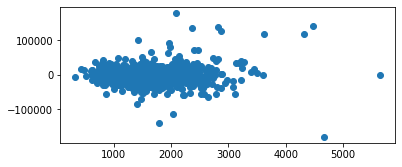

In [132]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(data['GrLivArea'],regFull.resid)

In [ ]:
print("The residual plot seems to be distributed randomly around 0, so the model seems fit the data well")

##Problem 3.4

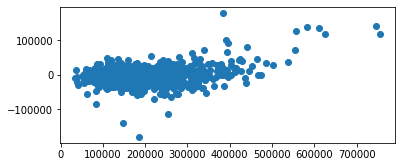

In [133]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(Y,regFull.resid)

In [ ]:
print("The residual plot seems to be distributed randomly around 0, so the model seems fit the data well")

##Problem 3.5

In [131]:
print("I made the missing continuous variables into zeroes since I believed that it was missing because the value")
print("didn't exist")

I made the missing continuous variables into zeroes since I believed that it was missing because the value
didn't exist
